### SPY Index

SP500 index ETF

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

start_date = '2014-01-01'
end_date = '2024-03-27'

data = yf.download('SPY', start = start_date, end = end_date)

data['Returns'] = data['Adj Close'].pct_change()
data['Cumulative Returns'] = (1 + data['Returns']).cumprod() - 1

[*********************100%%**********************]  1 of 1 completed


In [3]:
days = (i for i in range(3, 62, 2))
threshold = tuple([-i * 0.01 for i in range(3, 21)])

In [4]:
items = [(i, j) for i in days for j in threshold]

In [5]:
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')

days_threshold = pd.DataFrame(index=data.index)

for (a, b) in tqdm(items):
    returns_list = [] 
    start_dates = []  

    for i in range(len(data)):
        for j in range(i, len(data)):
            if data.iloc[j]['Cumulative Returns'] - data.iloc[i]['Cumulative Returns'] <= b: # 누적수익률의 차이가 threshold보다 작은 경우
                target_day = j + a # target day는 a일 후
                if target_day < len(data): # target day가 전체 데이터 길이보다 짧을 때에만 실행
                    start_dates.append(data.index[i]) # 투자했던 날짜 appending
                    returns_list.append(data.iloc[target_day]['Cumulative Returns'] - data.iloc[j]['Cumulative Returns'])
                break

    col_name = f"{a}days_{b}thresh"
    days_threshold[col_name] = pd.Series(returns_list, index=start_dates)

In [6]:
#days_threshold.to_csv('SPY_dist_start.csv')

In [7]:
#days_threshold.to_excel('SPY_dist_start.xlsx')

-5%가 찍힌 날을 보기

In [8]:
def freq_plot(frame, thres, days) :
    plt.bar(
        frame.index,
        frame,
        edgecolor = 'none',
        color = 'gray'
    )
    plt.grid(False)
    plt.ylabel('Frequency')
    data['Adj Close'].plot(secondary_y = True, color = 'darkorange', alpha = 0.75)
    plt.grid(False)
    plt.xlabel(f'frequency after {days} days from -{thres}% Cumulative Return')
    plt.title(f'Frequency of signal | {days} Days | -{thres}% Cum.Return')
    plt.show()
    return None

In [9]:
import seaborn as sns

In [140]:
from FinancialMachineLearning.backtest.backtest_synthetic_data import *

params = get_OU_params(data['Close']['2020':])

In [141]:
print(f"expected phi : {params['phi'] : .4f}")
print(f"expected forecast : {params['forecast'] : .4f}")
print(f"sigma : {params['sigma'] : .4f}")
print(f"half life : {params['half life'] : .4f}")

expected phi :  0.9961
expected forecast :  5.9824
sigma :  0.0141
half life :  175.9308


In [142]:
rPT = rSLm = np.linspace(0, 10, 21)
coeffs = {'forecast' : params['forecast'], 'hl' : params['half life'], 'sigma' : 1.0}

output = synthetic_simulation(
    coeffs = coeffs, 
    nIter = 1e5, 
    maxHP = 100, 
    rPT = rPT, 
    rSLm = rSLm
)

Total 441 iterations will be held.


441it [15:59,  2.18s/it]


In [143]:
sr_test = get_sharpe_grid(output, rPT, rSLm)

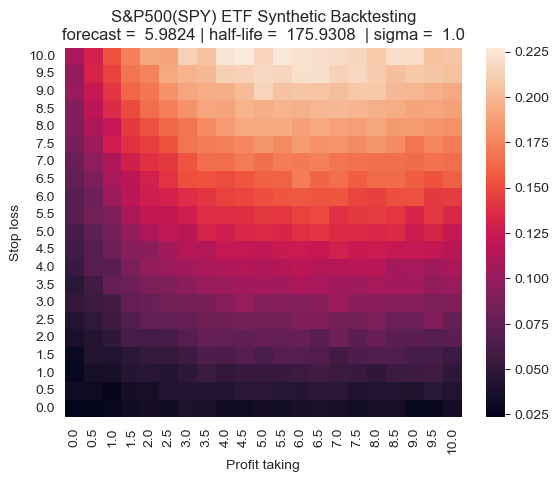

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(sr_test)
plt.title(f"S&P500(SPY) ETF Synthetic Backtesting\nforecast = {coeffs['forecast'] : .4f} | half-life = {coeffs['hl'] : .4f}  | sigma = {coeffs['sigma'] : .1f}")
plt.xlabel("Profit taking")
plt.ylabel("Stop loss")
plt.grid(False)
plt.show()

#### cumulative returns

In [6]:
return_data = pd.DataFrame(index = data.index)

In [7]:
for i in range(1, 501) :
    return_data['-' + str(i) + 'days'] = (data['Adj Close'] - data['Adj Close'].shift(i)) / data['Adj Close']

In [8]:
return_data.to_csv('returns_data_adj.csv')

In [9]:
return_data.to_excel('returns_data_adj.xlsx')

In [10]:
return_data.index = range(len(return_data))

In [11]:
return_data

,-1days,-2days,-3days,-4days,-5days,-6days,-7days,-8days,-9days,-10days,...,-491days,-492days,-493days,-494days,-495days,-496days,-497days,-498days,-499days,-500days
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.000164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.002906,-0.003071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.006104,0.003216,0.003053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.000218,0.006321,0.003433,0.003270,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2570,0.009165,0.014640,0.020462,0.013689,0.011736,0.010184,0.020719,0.019876,0.013957,0.023649,...,0.160035,0.149290,0.156516,0.158899,0.145751,0.140444,0.150947,0.156944,0.161041,0.173500
2571,0.003294,0.012428,0.017886,0.023688,0.016938,0.014991,0.013444,0.023944,0.023104,0.017205,...,0.171173,0.162802,0.152092,0.159294,0.161670,0.148565,0.143275,0.153744,0.159721,0.163804
2572,-0.001899,0.001401,0.010552,0.016020,0.021834,0.015071,0.013120,0.011571,0.022090,0.021249,...,0.165415,0.169599,0.161212,0.150481,0.157697,0.160077,0.146948,0.141648,0.152136,0.158125
2573,-0.002770,-0.004675,-0.001366,0.007811,0.013294,0.019124,0.012342,0.010386,0.008832,0.019381,...,0.165340,0.163102,0.167299,0.158888,0.148128,0.155363,0.157750,0.144584,0.139270,0.149787


In [23]:
import seaborn as sns
def my_plot(data, thres, days) -> None:
    sns.histplot(
        data, 
        bins=50, 
        alpha=0.75, 
        edgecolor = 'none', 
        kde = True,
        stat = "density"
    )
    plt.ylim([0, 15])
    plt.xlim([-1, 1])
    plt.axvline(0, color = 'k', ls = '--', alpha = 0.5)
    plt.xlabel(f'Returns after {days} days from -{thres}% Cumulative Return')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Returns | {days} Days | -{thres}% Cum.Return')
    plt.grid(False)
    filename = f'./figure/returns_distribution_{thres}per_{days}days.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')  # dpi는 해상도를 지정하고, bbox_inches='tight'는 여백을 최소화합니다.
    plt.show()
    return None

In [12]:
dataframes = dict()
dataframes_plot = dict()

for d, thres in tqdm(items) :
    thres = round(-thres * 100, 1)
    dataframes[f'day{d}_{thres}per'] = pd.DataFrame(index = data.index)
    dataframes_plot[f'day{d}_{thres}per_plot'] = pd.DataFrame(index = data.index)
    for i in range(1, 501) :
        temp = ((1 + data['Cumulative Returns'].iloc[return_data[return_data[str(-i) + 'days'] < -thres * 0.01][:-d].index + d]) / (1 + data['Cumulative Returns'].iloc[return_data[return_data[str(-i) + 'days'] < -thres * 0.01][:-d].index].values)) - 1
        dataframes[f'day{d}_{thres}per'] = pd.concat(
            [dataframes[f'day{d}_{thres}per'], temp], axis = 1
        )
        dataframes_plot[f'day{d}_{thres}per_plot'] = pd.concat(
            [dataframes_plot[f'day{d}_{thres}per_plot'], temp], axis = 0
        )
    dataframes[f'day{d}_{thres}per'].columns = [str(-i) + 'days' for i in range(1, 501)]
    dataframes[f'day{d}_{thres}per'].to_excel(f'./excel/SPY_day{d}_{int(thres)}per.xlsx')
    
import pickle

with open('snp500.pkl', 'wb') as f:
    pickle.dump(dataframes, f)

100%|██████████| 540/540 [2:04:19<00:00, 13.81s/it]  


In [20]:
for d, thres in tqdm(items) :
    thres = round(-thres * 100, 1)
    path = f'./parquet/SPY_day{d}_{int(thres)}per.parquet'
    dataframes[f'day{d}_{thres}per'].to_parquet(path)

100%|██████████| 540/540 [00:25<00:00, 21.31it/s]


In [26]:
#for d, thres in tqdm(items) :
#    thres = round(-thres * 100, 1)
#    my_plot(dataframes_plot[f'day{d}_{thres}per_plot'], int(thres), int(d))

In [29]:
days = [i for i in range(3, 62, 2)]
threshold = tuple([-i * 0.01 for i in range(3, 21)])

In [35]:
def statsplot(index, data, thresh) :
    plt.figure(figsize = (8, 8))
    plt.subplot(2, 2, 1)
    plt.plot(
        index, [i.mean() for i in data],
        marker = '.'
    )
    plt.grid(False)
    #plt.ylim([-0.05, 0.25])
    plt.axhline(0, color = 'gray', alpha = 0.75, ls = '-.')
    plt.title('mean')
    
    plt.subplot(2, 2, 2)
    plt.plot(
        index, [i.std() for i in data],
        marker = '.'
    )
    plt.grid(False)
    #plt.ylim([-0.05, 0.2])
    plt.axhline(0, color = 'gray', alpha = 0.75, ls = '-.')
    plt.title('standard dev')
    
    plt.subplot(2, 2, 3)
    plt.plot(
        index, [i.skew() for i in data],
        marker = '.'
    )
    plt.grid(False)
    #plt.ylim([-1, 1])
    plt.axhline(0, color = 'gray', alpha = 0.75, ls = '-.')
    plt.title('skewness')
    
    plt.subplot(2, 2, 4)
    plt.plot(
        index, [i.kurt() for i in data],
        marker = '.'
    )
    plt.grid(False)
    #plt.ylim([-1, 2.2])
    plt.axhline(0, color = 'gray', alpha = 0.75, ls = '-.')
    plt.title('kurtosis')
    
    plt.tight_layout()
    
    plt.suptitle(f'sim_thresh : {thresh}% | market : SPY ETF | start : {start_date} | end : {end_date}')
    plt.tight_layout()
    
    filename = f'./figure/SPY_distribution_{thresh}percent.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    
    return None

def pipeline(threshold, days, dataframes) :
    values = []

    for i in days :
        values.append(
            dataframes[f"day{i}_{threshold}.0per"].iloc[:,1:].stack().reset_index(drop=True)
        )
    
    statsplot(days, values, threshold)
    return None

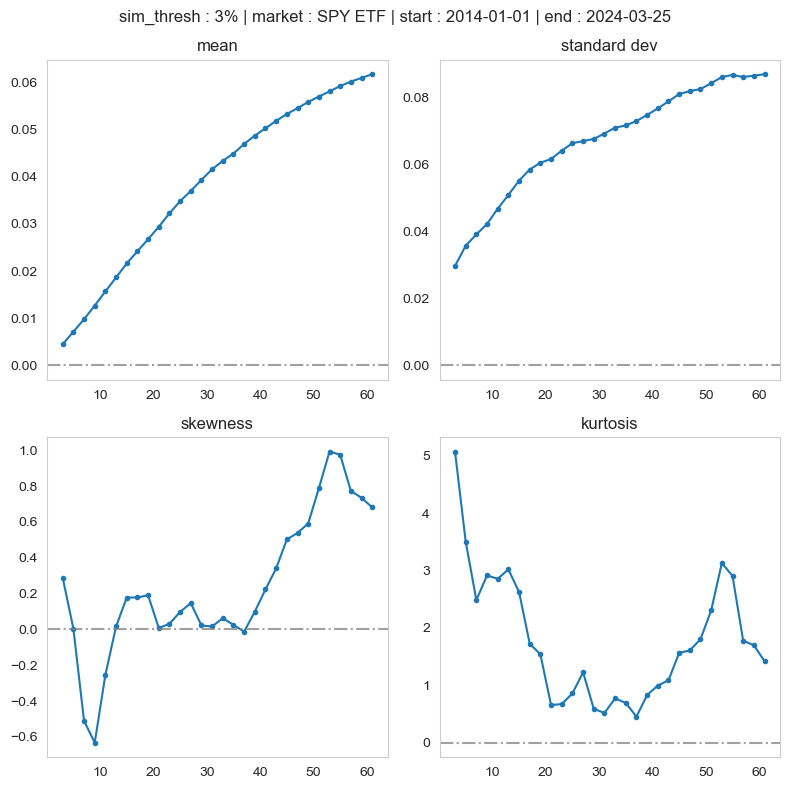

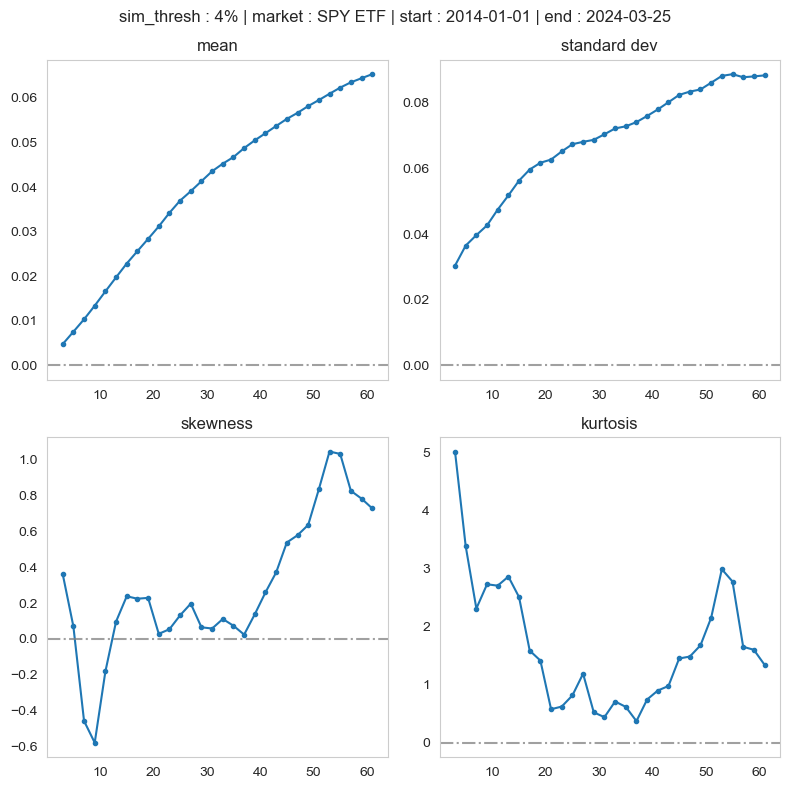

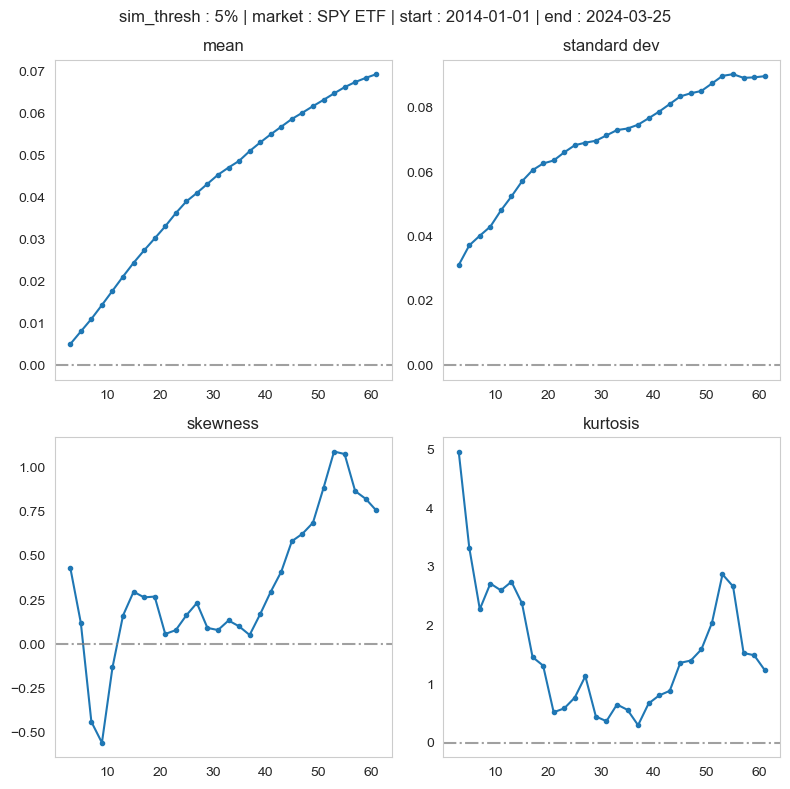

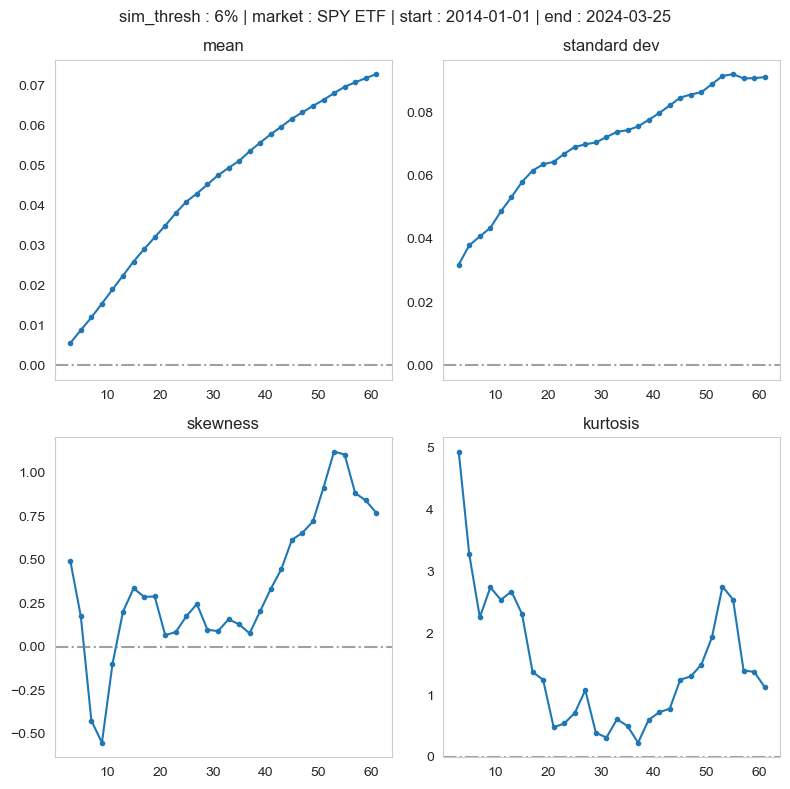

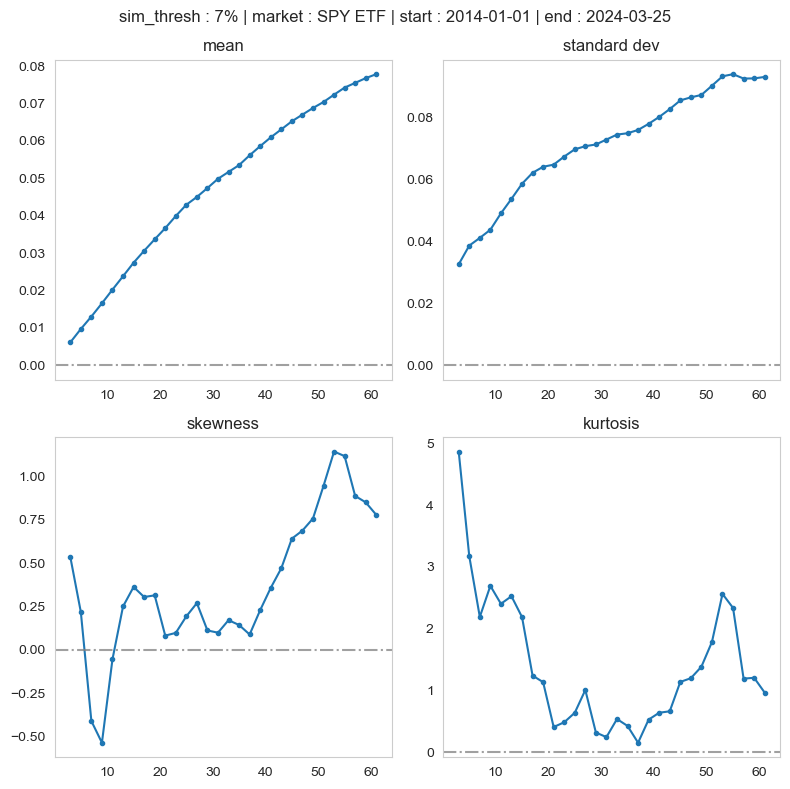

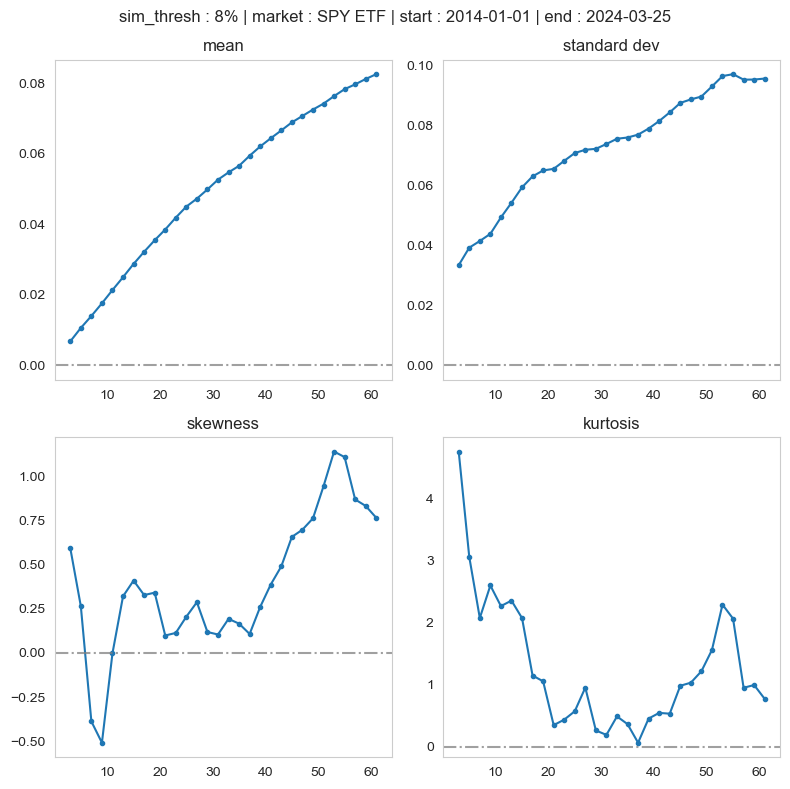

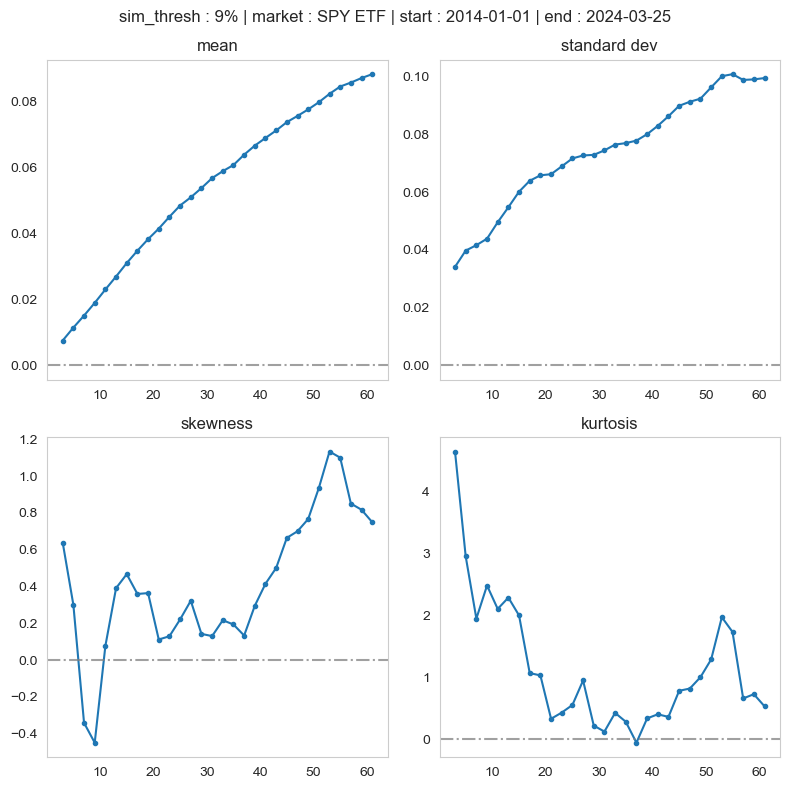

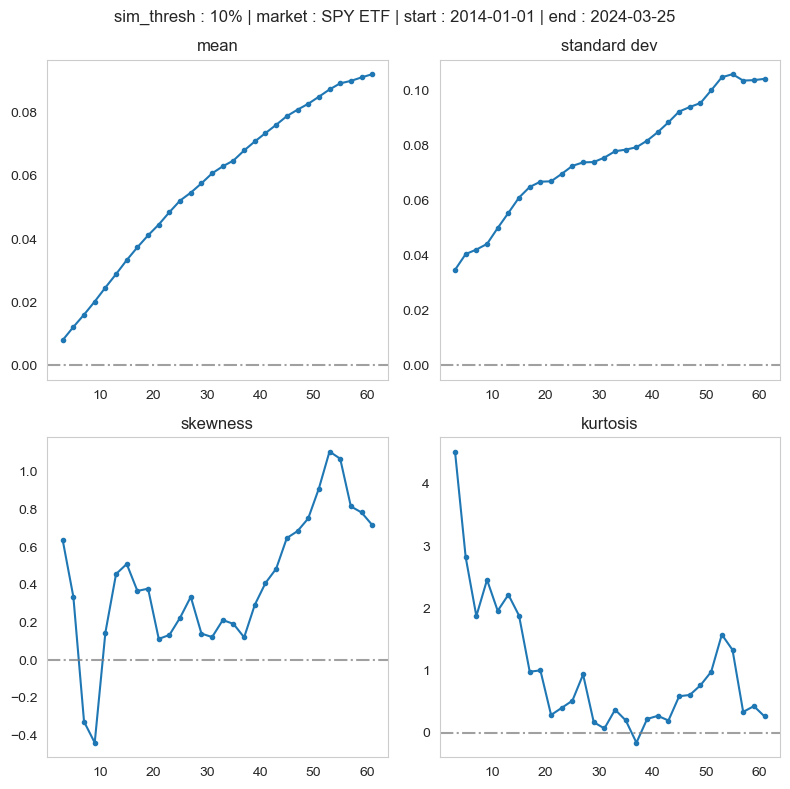

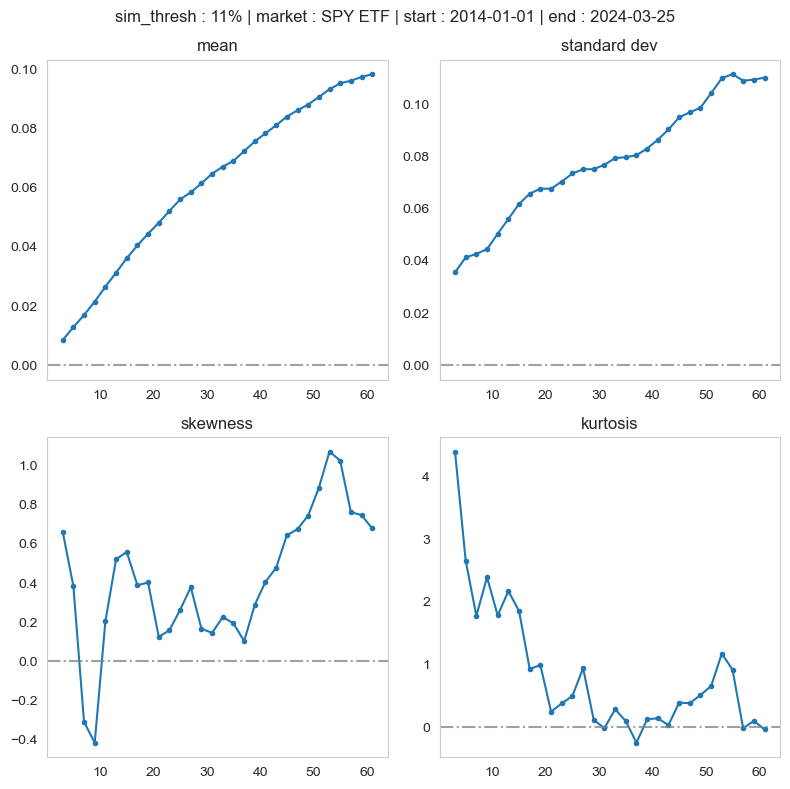

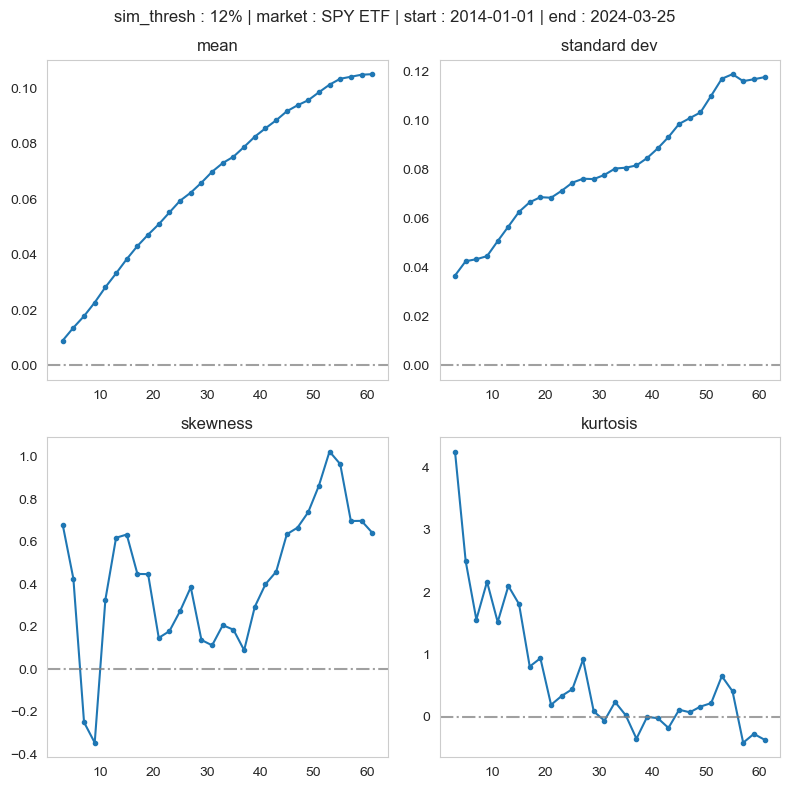

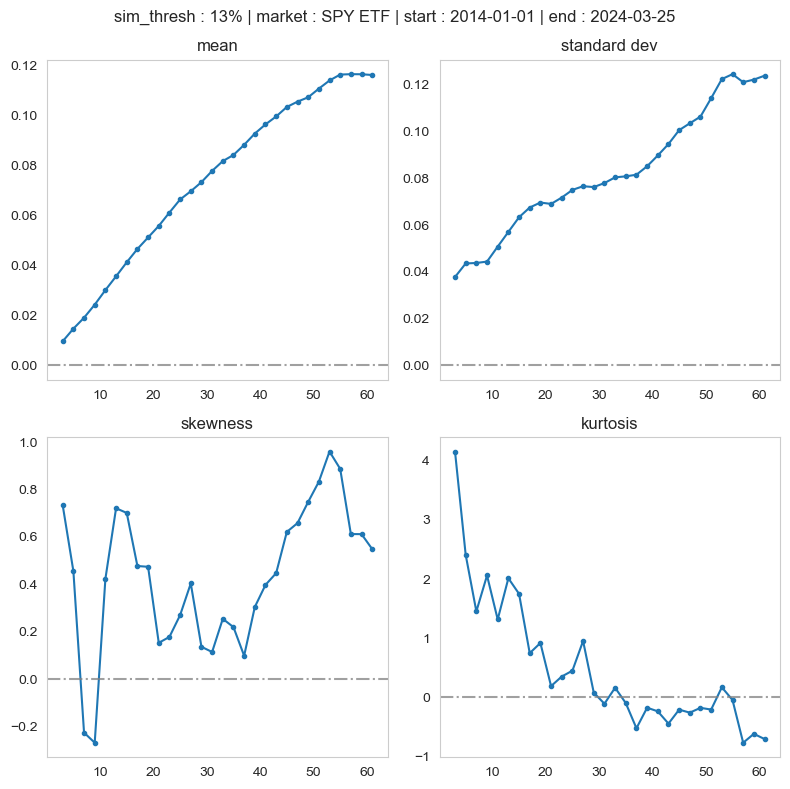

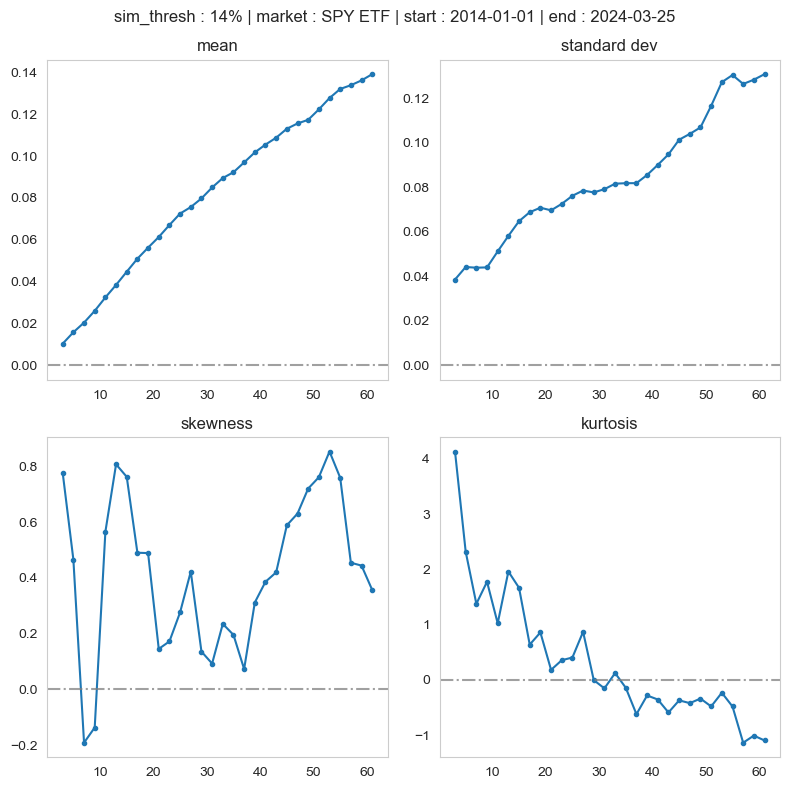

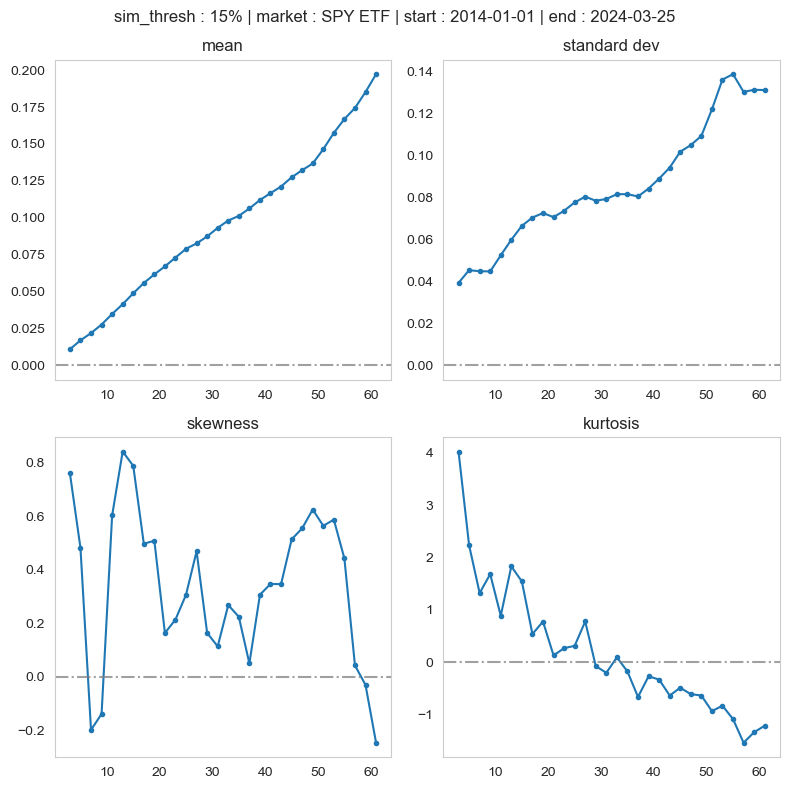

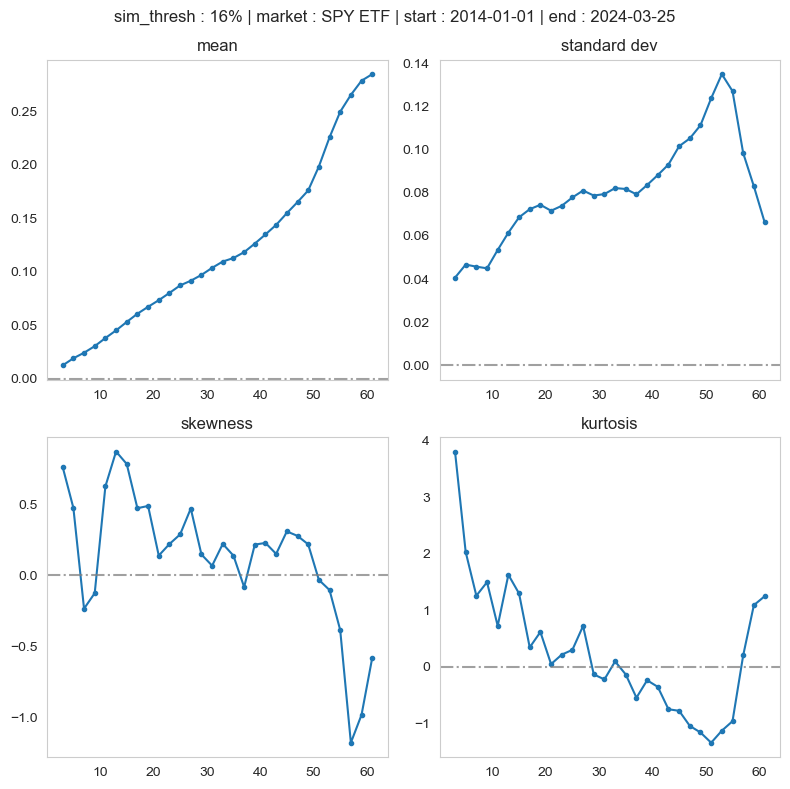

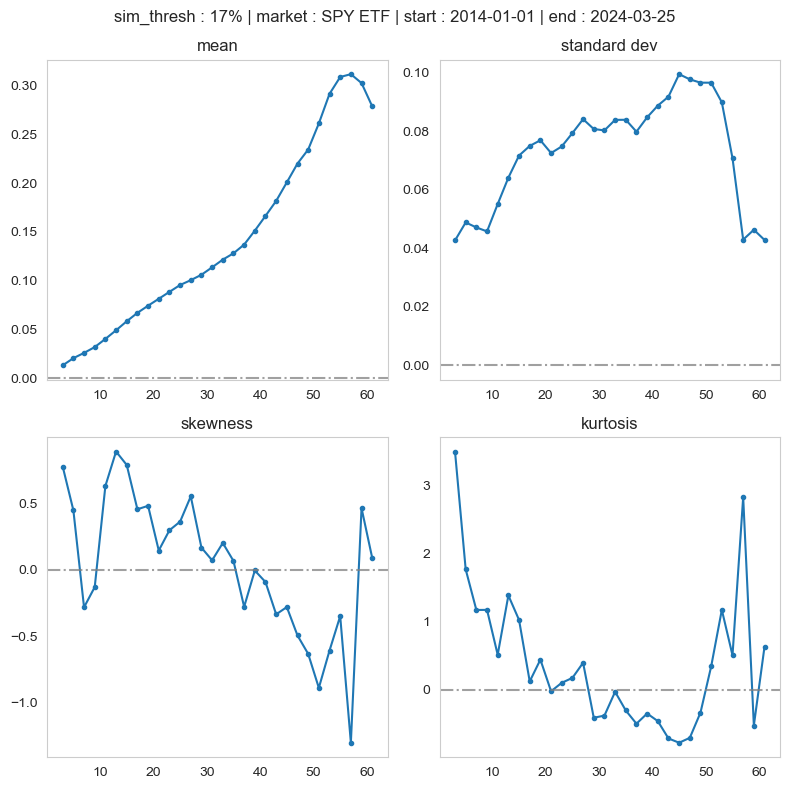

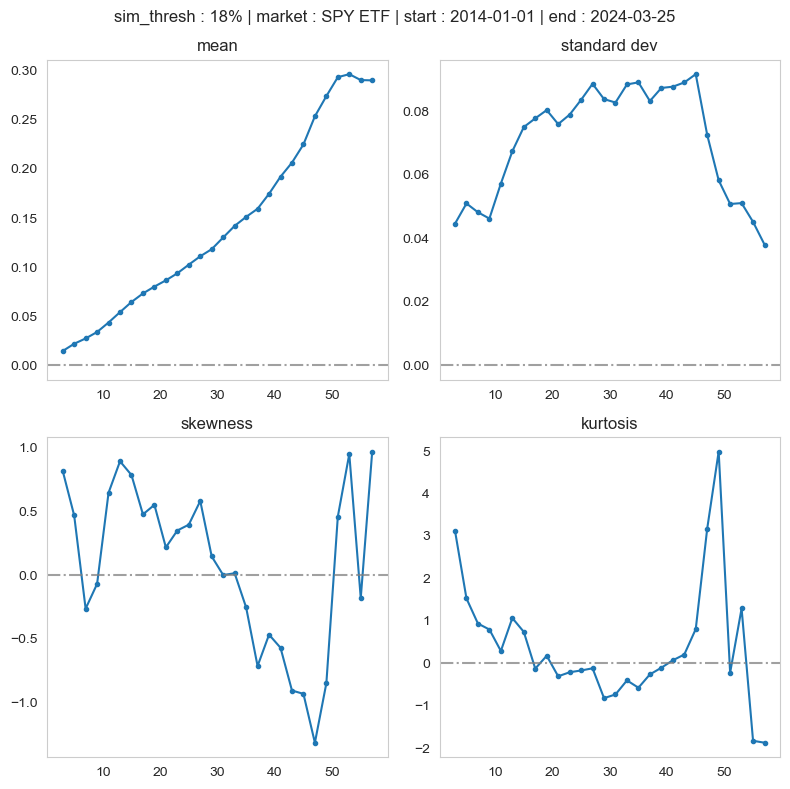

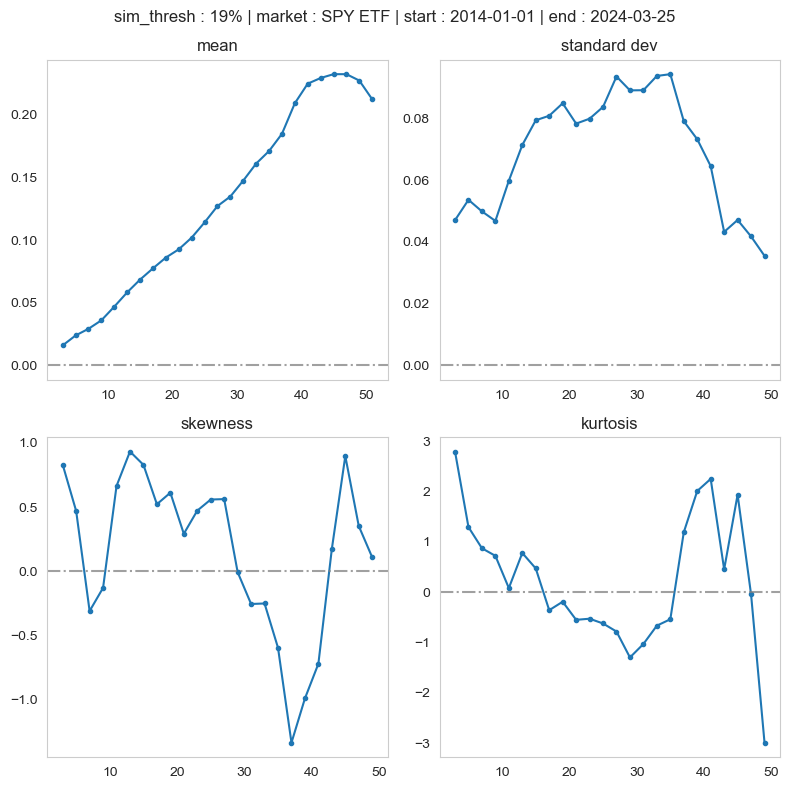

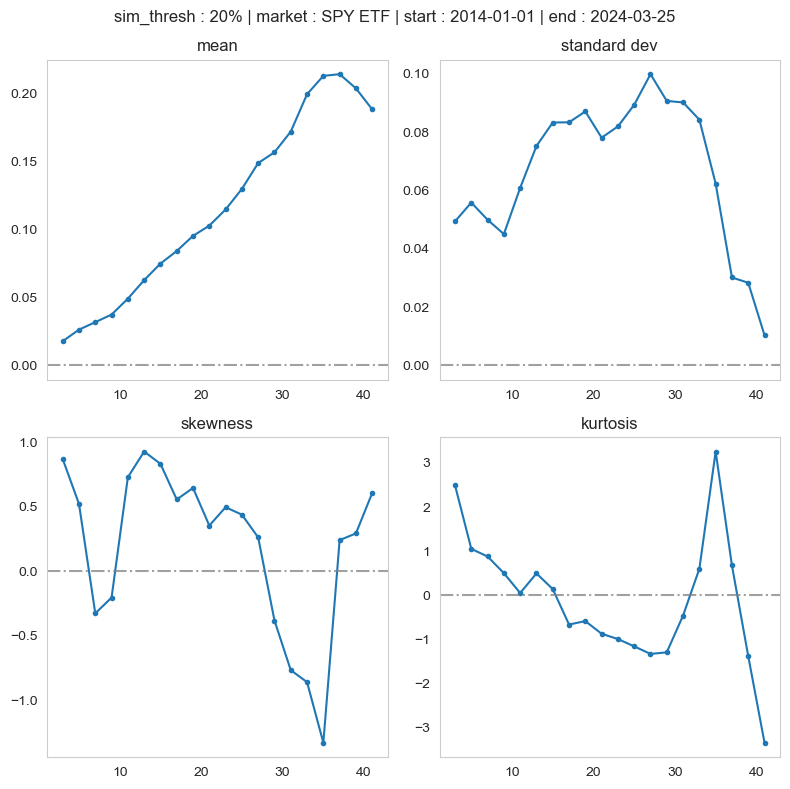

In [36]:
for i in threshold :
    t = -i * 100
    pipeline(int(t), days, dataframes)